# Determine the proportion of awards for US scientists over time

> For an upcoming feature, I’d like to include what share of science Nobel prizes (ideally, not including economics) the US has won. When I did a hand count, the US has the majority of science prizes in the past five years. What I’d like to know is whether that trend goes back many decades.

In [84]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
file_path = "data/laureates-1000.json"

with open(file_path, 'r') as file:
    data = json.load(file)

laureates = data['laureates']

In [86]:
data = []
no_affiations = []
unknown_countries = []

for laureate in laureates:
    # NAME
    name = laureate.get('knownName', {}).get('en', 'Unknown')

    prizes = laureate.get('nobelPrizes', [])
    if not prizes:  # Skip entries with missing prizes
        continue
    
    for prize in prizes:
        # CATEGORY Get the category of the first prize
        category = prize.get('category', {}).get('en')
        if category in ['Literature', 'Peace', 'Economic Sciences']:  # Exclude 'Literature' and 'Peace' prizes
            continue

        award_year = prize['awardYear']

        affiliations = prize.get('affiliations', [])

        if not affiliations:  # Skip entries with missing affiliations
            no_affiations.append(name)
            continue

        first_affiliation = affiliations[0]

        affil_country = first_affiliation.get('country', {}).get('en', "Unknown")

        if affil_country == "Unknown":
            unknown_countries.append(name)

        data.append({
            'name': name,
            'award_category': category,
            'award_year': int(award_year),
            'affil_country': affil_country,
        })

In [87]:
len(data)

641

In [88]:
data[:1]

[{'name': 'Aage N. Bohr',
  'award_category': 'Physics',
  'award_year': 1975,
  'affil_country': 'Denmark'}]

In [89]:
len(no_affiations)

5

In [90]:
print("The following laureates have no affiations listed and location is unknown:")
for name in no_affiations:
    print(name)

The following laureates have no affiations listed and location is unknown:
J. Robin Warren
Kary B. Mullis
Marie Curie
Martinus J.G. Veltman
William Knowles


In [91]:
unique_countries = set(entry['affil_country'] for entry in data)
print(f"There are {len(unique_countries)} unique countries in the data.")
print(list(unique_countries))

There are 29 unique countries in the data.
['Tunisia', 'China', 'India', 'Italy', 'United Kingdom', 'USSR', 'Spain', 'Belgium', 'USA', 'Australia', 'Austria', 'Japan', 'Switzerland', 'Sweden', 'Unknown', 'Czechoslovakia', 'Canada', 'Norway', 'Germany', 'Portugal', 'Russia', 'Argentina', 'Hungary', 'Denmark', 'Ireland', 'the Netherlands', 'Finland', 'Israel', 'France']


In [92]:
print("Are any of the countries missing?")
print("Unknown" in unique_countries)

Are any of the countries missing?
True


In [93]:
print("The following laureates have unknown countries:")
for name in unknown_countries:
    print(name)

The following laureates have unknown countries:
Barry C. Barish
Kip S. Thorne
Rainer Weiss


In [94]:
df = pd.DataFrame(data)
print(df.head())

                name award_category  award_year   affil_country
0       Aage N. Bohr        Physics        1975         Denmark
1  Aaron Ciechanover      Chemistry        2004          Israel
2         Aaron Klug      Chemistry        1982  United Kingdom
3        Abdus Salam        Physics        1979           Italy
4      Ada E. Yonath      Chemistry        2009          Israel


In [95]:
country_counts_by_year = df.groupby(['award_year', 'affil_country']).size().unstack(fill_value=0)
country_counts_by_year.head()

affil_country,Argentina,Australia,Austria,Belgium,Canada,China,Czechoslovakia,Denmark,Finland,France,...,Russia,Spain,Sweden,Switzerland,Tunisia,USA,USSR,United Kingdom,Unknown,the Netherlands
award_year,,,,,,,,,,,,,,,,,,,,,
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
1903,0,0,0,0,0,0,0,1,0,2,...,0,0,1,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,0
1905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
country_counts_by_year['Total'] = country_counts_by_year.sum(axis=1)
country_counts_by_year.head()

affil_country,Argentina,Australia,Austria,Belgium,Canada,China,Czechoslovakia,Denmark,Finland,France,...,Spain,Sweden,Switzerland,Tunisia,USA,USSR,United Kingdom,Unknown,the Netherlands,Total
award_year,,,,,,,,,,,,,,,,,,,,,
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,4
1903,0,0,0,0,0,0,0,1,0,2,...,0,1,0,0,0,0,0,0,0,4
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,3
1905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [97]:
country_counts_by_year['usa_percentage'] = country_counts_by_year['USA'] / country_counts_by_year['Total']

In [98]:
country_counts_by_year.head()

affil_country,Argentina,Australia,Austria,Belgium,Canada,China,Czechoslovakia,Denmark,Finland,France,...,Sweden,Switzerland,Tunisia,USA,USSR,United Kingdom,Unknown,the Netherlands,Total,usa_percentage
award_year,,,,,,,,,,,,,,,,,,,,,
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.0
1902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,4,0.0
1903,0,0,0,0,0,0,0,1,0,2,...,1,0,0,0,0,0,0,0,4,0.0
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,3,0.0
1905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.0


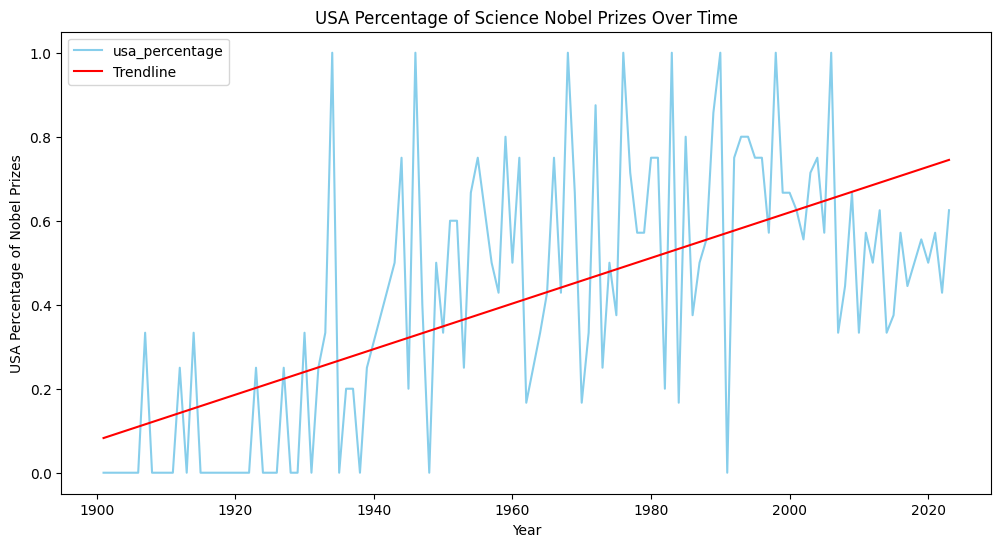

In [99]:
# Extract the data for the x and y axes
x = country_counts_by_year.index
y = country_counts_by_year['usa_percentage']

# Perform a linear regression to get the trendline
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the original data
fig, ax = plt.subplots(figsize=(12, 6))
country_counts_by_year['usa_percentage'].plot(kind='line', color='skyblue', ax=ax)

# Plot the trendline
ax.plot(x, trendline(x), label='Trendline', color='red')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('USA Percentage of Nobel Prizes')
ax.set_title('USA Percentage of Science Nobel Prizes Over Time')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [100]:
country_counts_by_year.to_csv('output/us-awards/country-counts-by-year.csv')

In [102]:
country_counts_post_1950 = country_counts_by_year[country_counts_by_year.index >= 1950].copy()
country_counts_post_1950

affil_country,Argentina,Australia,Austria,Belgium,Canada,China,Czechoslovakia,Denmark,Finland,France,...,Sweden,Switzerland,Tunisia,USA,USSR,United Kingdom,Unknown,the Netherlands,Total,usa_percentage
award_year,,,,,,,,,,,,,,,,,,,,,
1950,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,1,0,0,6,0.333333
1951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,1,0,0,5,0.600000
1952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,2,0,0,5,0.600000
1953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,4,0.250000
1954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,1,0,0,6,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0,0,0,0,0,0,0,0,0,0,...,0,2,0,5,0,1,0,0,9,0.555556
2020,0,0,0,0,1,0,0,0,0,0,...,0,0,0,4,0,1,0,0,8,0.500000
2021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,7,0.571429


In [103]:
total_sum = country_counts_post_1950['Total'].sum()
print(f"The sum of the 'Total' column in the country_counts_post_1950 dataframe is: {total_sum}")

The sum of the 'Total' column in the country_counts_post_1950 dataframe is: 484


In [105]:
usa_sum = country_counts_post_1950['USA'].sum()
print(f"The sum of the 'USA' column in the country_counts_post_1950 dataframe is: {usa_sum}")

The sum of the 'USA' column in the country_counts_post_1950 dataframe is: 276
